# Dengue Cases in Singapore from 2012 to 2021
<ol>
    <li>Background</li>
    <li>Data Cleaning</li>
    <li>Data Consolidation</li>
</ol>

<h2>1. Background:</h2>

Source: https://www.ncid.sg/Health-Professionals/Articles/Pages/Rise-in-dengue-cases-underscores-need-for-constant-vigilance.aspx

What were the factors that significantly increased occurences of dengue outbreaks in Singapore over the past 10 years?

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
print('Setup complete')

Setup complete


<h2>2. Data Cleaning</h2>
<h4>Cleaning data on Dengue cases dataset</h4>

In [318]:
infectious_data = 'Infectious diseases sg/weekly-infectious-disease-bulletin-cases_cleaned.csv'


df = pd.read_csv(infectious_data)
df = df.rename({'Row Labels': 'week'}, axis = 1)
df.set_index('week', inplace=True)

#custom_date_parser = lambda x: datetime.datetime.strptime(x, "%Y-W%U") # doesn't seem to be able to find the month and day for the week
#df['date'] = df['Row Labels'].apply(custom_date_parser).

#df = pd.read_csv(infectious_data, parse_dates = ['Row Labels'], date_parser = custom_date_parser )
#df = df.rename_axis('Year,Week', axis = 'rows').rename_axis('Infectious Disease', axis = 'columns')
df.head(10)

,Acute Viral Hepatitis A,Acute Viral hepatitis B,Acute Viral hepatitis C,Acute Viral Hepatitis E,Avian Influenza,Botulism,Campylobacter enteritis,Campylobacterenterosis,Chikungunya,Chikungunya Fever,...,Salmonellosis(non-enteric fevers),SARS,Tetanus,Typhoid,Viral Hepatitis A,Viral Hepatitis E,Yellow Fever,Zika,Zika Virus Infection,Grand Total
week,,,,,,,,,,,,,,,,,,,,,
2012-W01,NaN,NaN,0,NaN,0,NaN,NaN,6.0,NaN,0.0,...,26,0,NaN,6,1.0,3.0,0,NaN,NaN,463
2012-W02,NaN,0.0,0,NaN,0,NaN,NaN,7.0,NaN,1.0,...,24,0,NaN,3,2.0,0.0,0,NaN,NaN,469
2012-W03,NaN,0.0,0,NaN,0,NaN,NaN,9.0,NaN,1.0,...,21,0,NaN,5,3.0,0.0,0,NaN,NaN,599
2012-W04,NaN,1.0,0,NaN,0,NaN,NaN,8.0,NaN,0.0,...,12,0,NaN,1,3.0,2.0,0,NaN,NaN,470
2012-W05,NaN,1.0,0,NaN,0,NaN,NaN,8.0,NaN,0.0,...,37,0,NaN,5,2.0,0.0,0,NaN,NaN,606
2012-W06,NaN,1.0,0,NaN,0,NaN,NaN,5.0,NaN,0.0,...,40,0,NaN,0,0.0,4.0,0,NaN,NaN,850
2012-W07,NaN,0.0,0,NaN,0,NaN,NaN,8.0,NaN,0.0,...,29,0,NaN,2,0.0,2.0,0,NaN,NaN,938
2012-W08,NaN,0.0,0,NaN,0,NaN,NaN,8.0,NaN,1.0,...,12,0,NaN,3,0.0,3.0,0,NaN,NaN,1095
2012-W09,NaN,2.0,0,NaN,0,NaN,NaN,6.0,NaN,1.0,...,27,0,NaN,1,2.0,0.0,0,NaN,NaN,1233


<h4>Checking for null values and filling them with 0</h4>

In [319]:
df.isnull().sum()

Acute Viral Hepatitis A              261
Acute Viral hepatitis B                1
Acute Viral hepatitis C                0
Acute Viral Hepatitis E              261
Avian Influenza                        0
Botulism                             261
Campylobacter enteritis              261
Campylobacterenterosis               261
Chikungunya                          261
Chikungunya Fever                    261
Cholera                                0
Dengue Fever                           0
Dengue Haemorrhagic Fever              0
Diphtheria                             0
Ebola Virus Disease                  261
Encephalitis                           0
Haemophilus influenzae type b          0
Hand, Foot Mouth Disease             261
HFMD                                 261
Japanese Encephalitis                261
Legionellosis                          0
Leptospirosis                        261
Malaria                                0
Measles                                1
Melioidosis     

In [320]:
df.dropna(axis = 1, how = 'all', inplace=True)
df.fillna(0, inplace=True)
df.head()


,Acute Viral Hepatitis A,Acute Viral hepatitis B,Acute Viral hepatitis C,Acute Viral Hepatitis E,Avian Influenza,Botulism,Campylobacter enteritis,Campylobacterenterosis,Chikungunya,Chikungunya Fever,...,Salmonellosis(non-enteric fevers),SARS,Tetanus,Typhoid,Viral Hepatitis A,Viral Hepatitis E,Yellow Fever,Zika,Zika Virus Infection,Grand Total
week,,,,,,,,,,,,,,,,,,,,,
2012-W01,0.0,0.0,0,0.0,0,0.0,0.0,6.0,0.0,0.0,...,26,0,0.0,6,1.0,3.0,0,0.0,0.0,463
2012-W02,0.0,0.0,0,0.0,0,0.0,0.0,7.0,0.0,1.0,...,24,0,0.0,3,2.0,0.0,0,0.0,0.0,469
2012-W03,0.0,0.0,0,0.0,0,0.0,0.0,9.0,0.0,1.0,...,21,0,0.0,5,3.0,0.0,0,0.0,0.0,599
2012-W04,0.0,1.0,0,0.0,0,0.0,0.0,8.0,0.0,0.0,...,12,0,0.0,1,3.0,2.0,0,0.0,0.0,470
2012-W05,0.0,1.0,0,0.0,0,0.0,0.0,8.0,0.0,0.0,...,37,0,0.0,5,2.0,0.0,0,0.0,0.0,606


In [321]:
df.columns

Index(['Acute Viral Hepatitis A', 'Acute Viral hepatitis B',
       'Acute Viral hepatitis C', 'Acute Viral Hepatitis E', 'Avian Influenza',
       'Botulism', 'Campylobacter enteritis', 'Campylobacterenterosis',
       'Chikungunya', 'Chikungunya Fever', 'Cholera', 'Dengue Fever',
       'Dengue Haemorrhagic Fever', 'Diphtheria', 'Ebola Virus Disease',
       'Encephalitis', 'Haemophilus influenzae type b',
       'Hand, Foot Mouth Disease', 'HFMD', 'Japanese Encephalitis',
       'Legionellosis', 'Leptospirosis', 'Malaria', 'Measles', 'Melioidosis',
       'Meningococcal Infection', 'Mumps', 'Murine Typhus', 'Nipah',
       'Nipah virus infection', 'Paratyphoid', 'Pertussis', 'Plague',
       'Pneumococcal Disease (invasive)', 'Poliomyelitis', 'Rubella',
       'Salmonellosis(non-enteric fevers)', 'SARS', 'Tetanus', 'Typhoid',
       'Viral Hepatitis A', 'Viral Hepatitis E', 'Yellow Fever', 'Zika',
       'Zika Virus Infection', 'Grand Total'],
      dtype='object')

In [322]:
s_dengue = df.loc[:,'Dengue Fever']
s_dengue.name = 'dengue cases'
s_dengue

week
2012-W01    74
2012-W02    64
2012-W03    60
2012-W04    50
2012-W05    84
            ..
2021-W48    48
2021-W49    64
2021-W50    61
2021-W51    68
2021-W52    76
Name: dengue cases, Length: 522, dtype: int64

In [323]:
s_dengue.isnull().sum() #confirming there are no null values for dengue column

0

In [324]:
s_dengue.describe()

count     522.000000
mean      252.662835
std       259.314772
min        24.000000
25%        77.000000
50%       186.000000
75%       339.000000
max      1791.000000
Name: dengue cases, dtype: float64

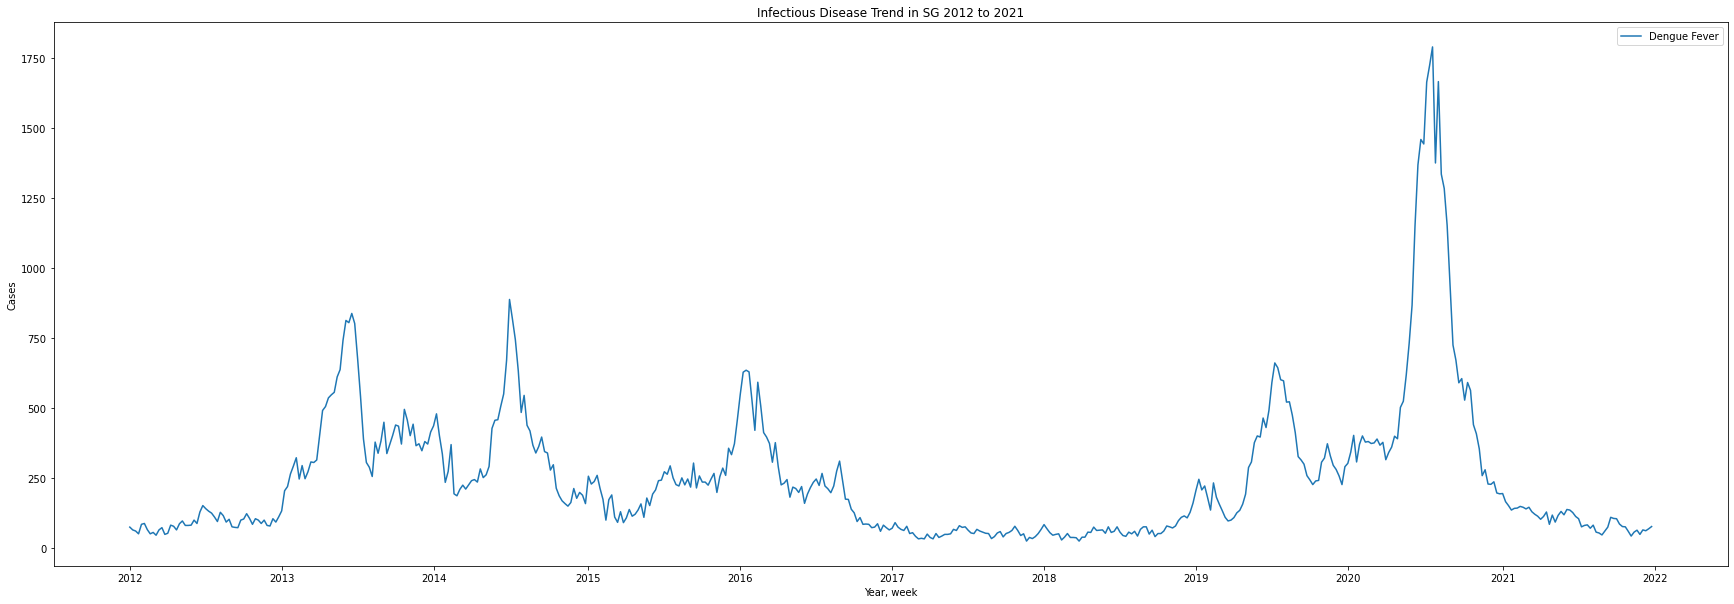

In [325]:
plt.figure(figsize = (30, 10))
plt.title('Infectious Disease Trend in SG 2012 to 2021')
plt.xlabel('Year, week')
plt.ylabel('Cases')

ax = sns.lineplot(data=s_dengue, label='Dengue Fever')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(52))
ax.xaxis.set_major_locator(ticker.FixedLocator([0,52,104,157,209,261,313,365,417,470,522]))
ax.set_xticklabels(('2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'))

plt.show()

In [326]:
df = df.fillna(0)
s_HFMD = df['HFMD'] + df['Hand, Foot Mouth Disease']
s_HFMD.name = 'HFMD cases'
s_HFMD

week
2012-W01    326.0
2012-W02    346.0
2012-W03    463.0
2012-W04    372.0
2012-W05    444.0
            ...  
2021-W48      0.0
2021-W49      0.0
2021-W50      0.0
2021-W51      0.0
2021-W52      0.0
Name: HFMD cases, Length: 522, dtype: float64

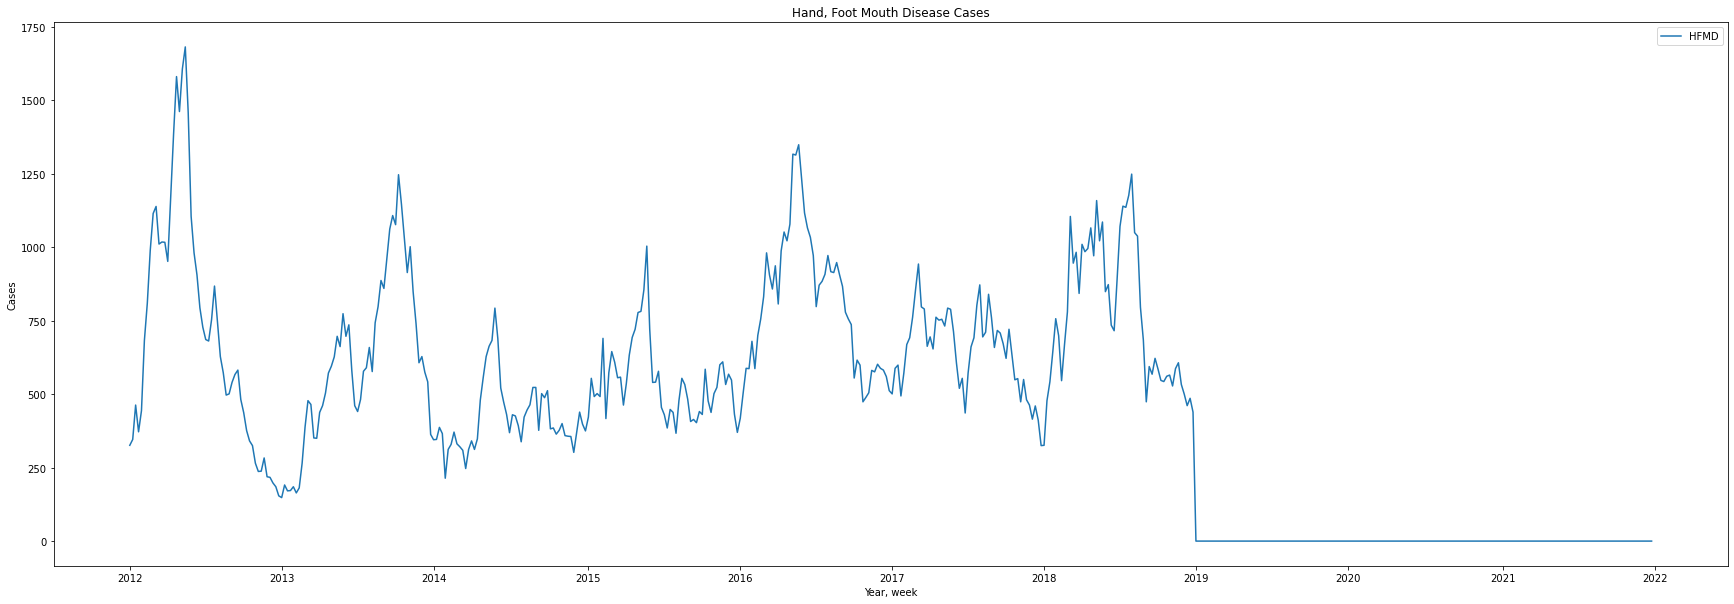

In [327]:
plt.figure(figsize=(30,10))
plt.title('Hand, Foot Mouth Disease Cases')
plt.xlabel('Year, week')
plt.ylabel('Cases')

HFMD = sns.lineplot(data = s_HFMD, label='HFMD')
HFMD.xaxis.set_major_locator(ticker.FixedLocator([0,52,104,157,209,261,313,365,417,470,522]))
HFMD.set_xticklabels(('2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'))

plt.show()

In [328]:
df_full= pd.merge(s_dengue, s_HFMD, left_index=True, right_index=True)
df_full

,dengue cases,HFMD cases
week,,
2012-W01,74,326.0
2012-W02,64,346.0
2012-W03,60,463.0
2012-W04,50,372.0
2012-W05,84,444.0
...,...,...
2021-W48,48,0.0
2021-W49,64,0.0
2021-W50,61,0.0


In [329]:
df_covid = pd.read_csv('Infectious diseases sg/covid-19-case-numbers/epidemic-curve.csv')
df_covid

,date,type,value
0,2020-01-23,Imported,1
1,2020-01-23,Local,0
2,2020-01-24,Imported,2
3,2020-01-24,Local,0
4,2020-01-25,Imported,1
...,...,...,...
1843,2022-08-01,Local,4548
1844,2022-08-02,Imported,353
1845,2022-08-02,Local,9877
1846,2022-08-03,Imported,289


In [330]:
s_local = df_covid[(df_covid['type']=='Local')]
display(s_local.head())
display(s_local.isnull().sum())

s_imported = df_covid[(df_covid['type']=='Imported')]
display(s_imported.head())
display(s_imported.isnull().sum())

,date,type,value
1,2020-01-23,Local,0
3,2020-01-24,Local,0
5,2020-01-25,Local,0
7,2020-01-26,Local,0
9,2020-01-27,Local,0


date     0
type     0
value    0
dtype: int64

,date,type,value
0,2020-01-23,Imported,1
2,2020-01-24,Imported,2
4,2020-01-25,Imported,1
6,2020-01-26,Imported,0
8,2020-01-27,Imported,1


date     0
type     0
value    0
dtype: int64

In [331]:
df_covid = pd.merge(s_local, s_imported, on='date')
df_covid

,date,type_x,value_x,type_y,value_y
0,2020-01-23,Local,0,Imported,1
1,2020-01-24,Local,0,Imported,2
2,2020-01-25,Local,0,Imported,1
3,2020-01-26,Local,0,Imported,0
4,2020-01-27,Local,0,Imported,1
...,...,...,...,...,...
919,2022-07-30,Local,6297,Imported,261
920,2022-07-31,Local,4913,Imported,193
921,2022-08-01,Local,4548,Imported,161
922,2022-08-02,Local,9877,Imported,353


In [332]:
df_covid.columns = ['date', 'l', 'local cases', 'i', 'imported cases']
df_covid.drop(['i', 'l'], axis = 1,  inplace=True)
df_covid['total cases'] = df_covid['local cases'] + df_covid['imported cases']
df_covid

,date,local cases,imported cases,total cases
0,2020-01-23,0,1,1
1,2020-01-24,0,2,2
2,2020-01-25,0,1,1
3,2020-01-26,0,0,0
4,2020-01-27,0,1,1
...,...,...,...,...
919,2022-07-30,6297,261,6558
920,2022-07-31,4913,193,5106
921,2022-08-01,4548,161,4709
922,2022-08-02,9877,353,10230


In [333]:
df_covid['date'] = df_covid.date.apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d')) 
#parse the date into datetime objects
df_covid.dtypes

date              datetime64[ns]
local cases                int64
imported cases             int64
total cases                int64
dtype: object

In [334]:
df_covid['week'] = df_covid.date.apply(lambda x: datetime.datetime.strftime(x, "%Y-W%U"))
df_covid = df_covid[['date', 'week', 'local cases','imported cases', 'total cases']] #rearrange the dataframe
df_covid

,date,week,local cases,imported cases,total cases
0,2020-01-23,2020-W03,0,1,1
1,2020-01-24,2020-W03,0,2,2
2,2020-01-25,2020-W03,0,1,1
3,2020-01-26,2020-W04,0,0,0
4,2020-01-27,2020-W04,0,1,1
...,...,...,...,...,...
919,2022-07-30,2022-W30,6297,261,6558
920,2022-07-31,2022-W31,4913,193,5106
921,2022-08-01,2022-W31,4548,161,4709
922,2022-08-02,2022-W31,9877,353,10230


In [335]:
piv = pd.pivot_table(df_covid, index =['week'], aggfunc = np.sum)
piv

,imported cases,local cases,total cases
week,,,
2020-W03,4,0,4
2020-W04,14,0,14
2020-W05,3,19,22
2020-W06,1,31,32
2020-W07,2,15,17
...,...,...,...
2022-W27,2596,60178,62774
2022-W28,3490,61728,65218
2022-W29,2548,61334,63882


<AxesSubplot:xlabel='week', ylabel='total cases'>

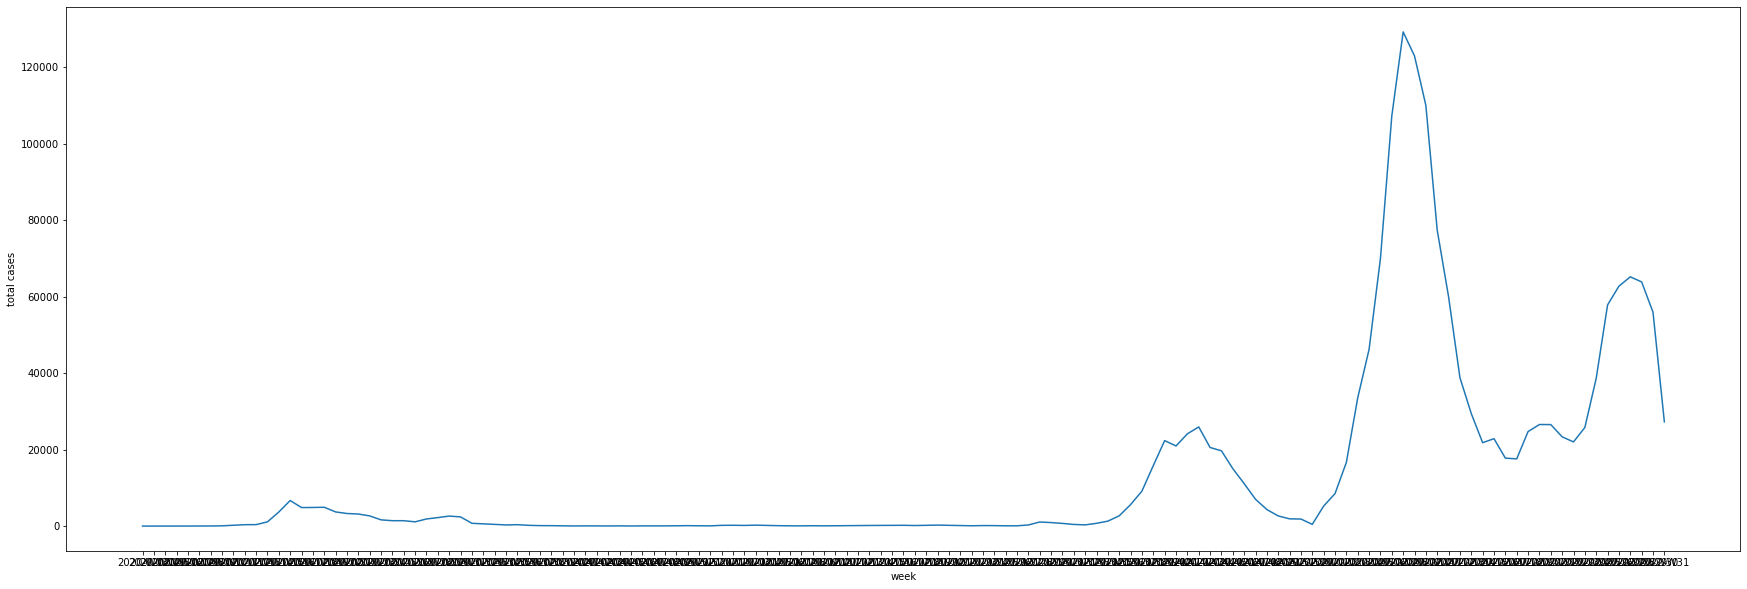

In [336]:
plt.figure(figsize=(30,10))
sns.lineplot(data= piv, x= 'week', y = 'total cases')

In [337]:
df_full = pd.merge(df_full, piv, how='outer', left_index=True, right_index=True)
df_full.fillna(0, inplace=True)
df_display = df_full.loc['2017-W01':'2020-W52',['dengue cases','HFMD cases','total cases']]

<AxesSubplot:xlabel='week'>

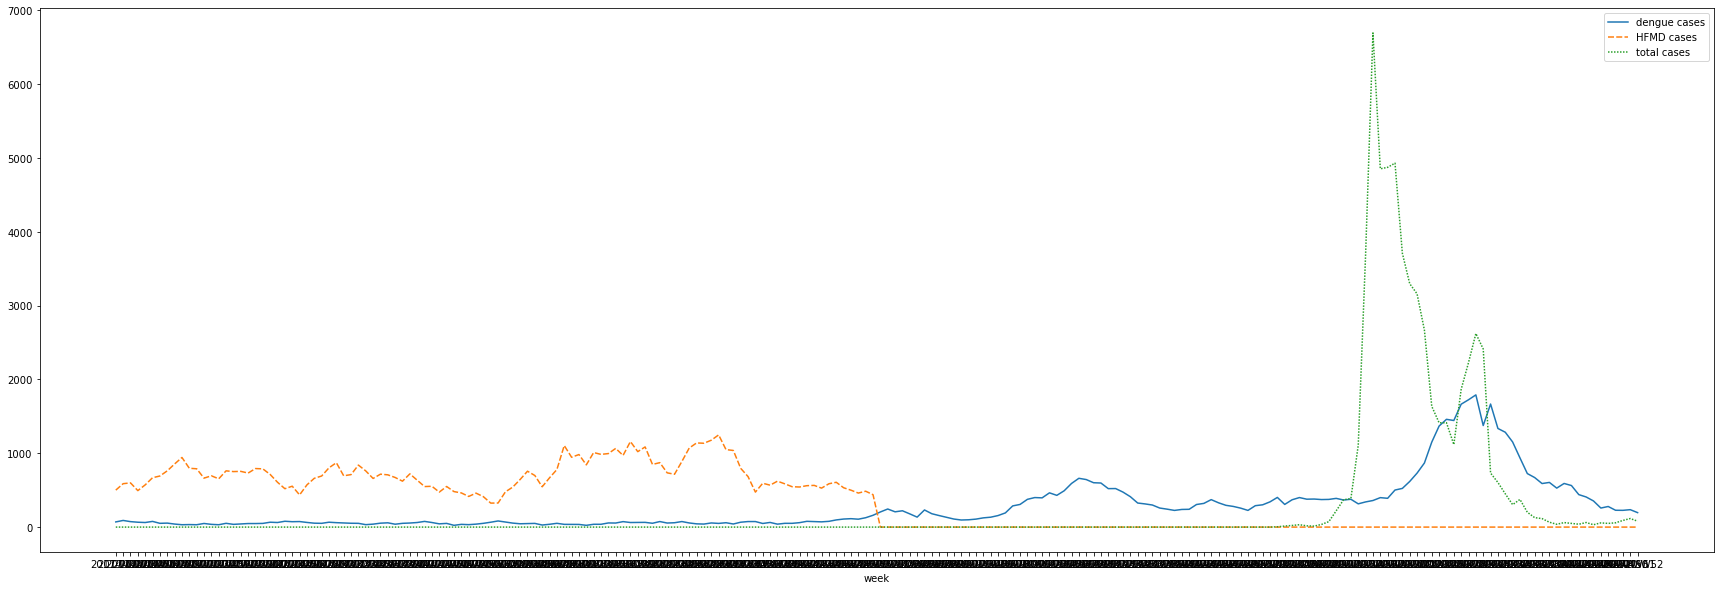

In [338]:
plt.figure(figsize = (30,10))
sns.lineplot(data = df_display)